In [1]:
import os
import sys
sys.path.append("..")
from nebula.plots import readCrossValidationMetricFile
from nebula.misc import get_path

SCRIPT_ROOT = get_path(type="notebook")
REPO_ROOT = os.path.join(SCRIPT_ROOT, "..")

metricFiles = {
    "cnn_whitespace": r"evaluation\crossValidation\_modelSelection_50k\CNNLinear\metrics_trainSize_76126_ep_3_cv_2_vocabSize_50000_embeddingDim_64_hiddenNeurons_512_256_128_batchNormConv_False_batchNormFFNN_False_filterSizes_2_3_4_5_dropout_0.3.json",
    "cnn_bpe": r"evaluation\crossValidation\BPE\CNNLinear\metrics_trainSize_76126_ep_3_cv_2_vocabSize_50000_maxLen_512_embeddingDim_64_hiddenNeurons_512_256_128_batchNormConv_False_batchNormFFNN_False_filterSizes_2_3_4_5_dropout_0.3.json",
    "transformer_whitespace": r"evaluation\crossValidation\_modelSelection_50k\Transformer\metrics_trainSize_76126_ep_3_cv_2_vocabSize_50000_maxLen_2048_dModel_64_nHeads_8_dHidden_256_nLayers_8_numClasses_1_hiddenNeurons_64_layerNorm_False_dropout_0.3.json",
    "transformer_bpe": r"evaluation\crossValidation\Transformer_512_BPE\longRun_30_epochs\metrics_trainSize_76126_ep_30_cv_3_vocabSize_50000_maxLen_512_dModel_64_nHeads_8_dHidden_256_nLayers_2_numClasses_1_hiddenNeurons_64_layerNorm_False_dropout_0.3.json"
}
for key in metricFiles:
    metricFiles[key] = os.path.join(REPO_ROOT, metricFiles[key])

In [2]:
metrics = {}
for file in metricFiles:
    metrics[file] = readCrossValidationMetricFile(metricFiles[file])[0]

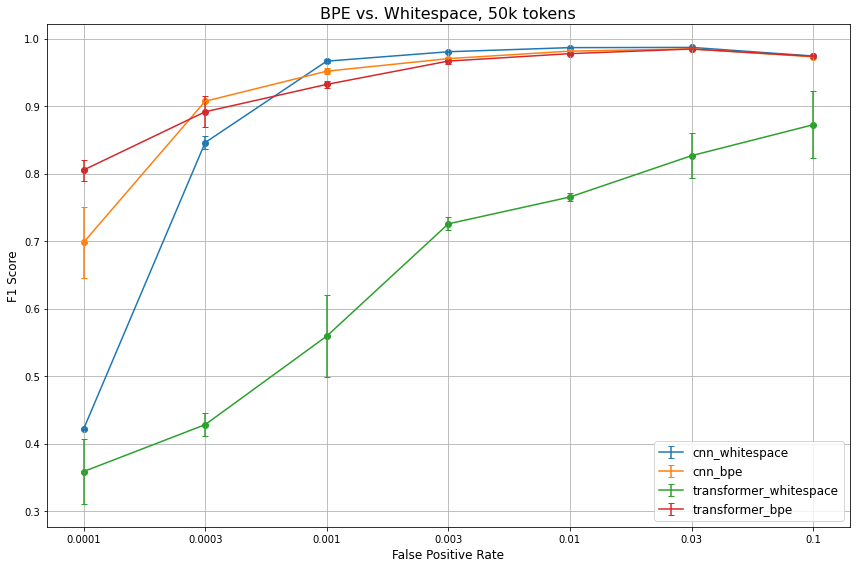

In [3]:
import matplotlib.pyplot as plt

fprates = list(metrics['cnn_whitespace'].index)
fig, ax = plt.subplots(1,1, figsize=(12,8))
for key in metrics:
    f1_avg = metrics[key].loc[:, 'f1_avg']
    f1_std = metrics[key].loc[:, 'f1_std']
    # plot f1_avg and f1_std
    ax.errorbar(fprates, f1_avg, yerr=f1_std, label=key, capsize=3)
    ax.scatter(fprates, f1_avg)
ax.legend(fontsize=12)
ax.grid()
ax.set_xlabel("False Positive Rate", fontsize=12)
ax.set_ylabel("F1 Score", fontsize=12)
ax.set_title("BPE vs. Whitespace, 50k tokens", fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(REPO_ROOT, "img", "BPE_vs_whitespace_50k.png"), dpi=300)

In [7]:
import json
with open(os.path.join(REPO_ROOT, "nebula\objects\speakeasy_BPE_50000_vocab.json")) as f:
    bpe = json.load(f)
bpe = list(bpe.keys())

In [9]:
print(bpe[5:55])

['er', '00', 'ne', '32', '32.', '▁k', 'l32.', 'erne', '▁kerne', '▁kernel32.', '▁0x1', '▁0x0', 'et', 'ad', 'al', 'ti', 'get', '000', '▁0x7', 're', 'ec', '▁0x4', '▁0xf', 'in', 'oc', '▁0x77', 'iti', 'ee', '▁0xfee', '▁0xfeee', 'ss', 'pr', 'one', 'tr', '0000', 'proc', 'ter', 'getproc', 'sec', 'dre', 'cal', 'on', 'secti', 'addre', 'address', 'getprocaddress', 'riti', 'ritical', 'riticalsecti', 'le']


In [10]:
import json
with open(os.path.join(REPO_ROOT, "nebula\objects\speakeasy_whitespace_10000_vocab.json")) as f:
    whitespace = json.load(f)
whitespace = list(whitespace.keys())

In [12]:
print(whitespace[5:25])

['kernel32.getprocaddress', '0x1000', 'null', '0x77000000', 'kernel32.isbadreadptr', '0xfa0', '0xfeee0001', 'kernel32.tlsgetvalue', 'kernel32.initializecriticalsectionex', 'kernel32.flsgetvalue', 'kernel32.heapalloc', '0x100', 'kernel32.leavecriticalsection', 'kernel32.entercriticalsection', 'kernel32.getlasterror', '0x46f0', 'kernel32.setlasterror', '0x45f0', 'kernel32.encodepointer', '0x46d0']
